# Distributions of discrete random variables

Consider the four-element sample space

$\Omega=\left\{ 0,1\right\} \times\left\{ 0,1\right\}$

$\Omega = {(0,0),(0,1),(1,0),(1,1)}$

Its elements will be denoted

$\left(\omega_{1},\omega_{2}\right)$

One can think of $\Omega$ as corresponding to two coin flips.
We specify the event space $\mathcal{F}$ as the power set of $\Omega$, that is, the set of all subsets of $\Omega$.
We choose the probability measure $P$ to assigns equal probability to each outcome in $\Omega$.
The corresponding probability space is the triplet $\left(\Omega,\mathcal{F},P\right)$.

## 1.
Define a random variable $X$ as

$X\left(\omega_{1},\omega_{2}\right)=\omega_{1}+\omega_{2}$

What is the minimum and maximum of $X$? What is the mean value (i.e. expectation) of this variable? What is the cumulative distribution function of $X$? Answer these questions analytically and use numerical simulations in Python as a check of correctness of your answers.

### Analytic solution

$$
outcomes = 
\begin{cases}
0 + 0 = 0 \\
0 + 1 = 1 \\
1 + 0 = 1 \\
1 + 1 = 2 \\
\end{cases}
$$
$$min = 0$$
$$max = 2$$
$$mean = \dfrac{(0+0) + (0+1) + (1+0) + (1+1)} 4 = 1$$
$$
CDF = 
\begin{cases}
\begin{array}{l l}
0 & \quad \text{for } x < 0\\
\frac{1}{4} & \quad \text{for } 0 \leq x < 1\\
\frac{3}{4} & \quad \text{for } 1 \leq x < 2 \\
1 & \quad \text{for } x \geq 2\\
\end{array}
\end{cases}
$$

### Simulation

In [1]:
import numpy as np
from typing import List, Tuple, Callable
import matplotlib.pyplot as plt

def X(w1: int, w2: int) -> int: 
    return w1 + w2


def simulate(
    omega: List[Tuple[int, int]], 
    rdm_var: Callable, 
    num_draws: int
) -> List[int]:
    draws = []
    
    for _ in range(num_draws):
        choice = np.random.choice(np.arange(len(omega)))
        draw = rdm_var(*omega[choice])
        draws.append(draw)

    return draws


def cdf(draws: List[int]) -> None:
    bins = [i for i in range(min(draws)-1, max(draws) + 2)]
    running_total = 0

    for b in bins:
        running_total += draws.count(b) / len(draws)
        print(f"{b}: {running_total}")

    plt.hist(
        draws, 
        bins=bins, 
        density=1, 
        cumulative=True, 
        label='CDF'
    )

min = 0
max = 2
mean = 1.00289
-1: 0.0
0: 0.24904
1: 0.74807
2: 1.0
3: 1.0


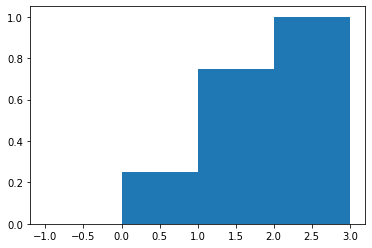

In [2]:
num_draws = 100_000
omega = [(0, 0), (0, 1), (1, 0), (1, 1)]
draws = simulate(omega, X, num_draws)

print(f"min = {min(draws)}")
print(f"max = {max(draws)}")
print(f"mean = {np.mean(draws)}")
cdf(draws)

## 2.

Define a random variable $Y$ as

$Y\left(\omega_{1},\omega_{2}\right)=\omega_{1}-\omega_{2}$

What is the minimum and maximum of $Y$? What is the mean value (i.e. expectation) of this variable? What is the cumulative distribution function of $Y$? Answer these questions analytically and use numerical simulations in Python as a check of correctness of your answers.

### Analytic Solution

$$
outcomes = 
\begin{cases}
0 - 0 = 0 \\
0 - 1 = -1 \\
1 - 0 = 1 \\
1 - 1 = 0 \\
\end{cases}
$$
$$min = -1$$
$$max = 1$$
$$mean = \dfrac{(0-0) + (0-1) + (1-0) + (1-1)} 4 = 0$$
$$
CDF = 
\begin{cases}
\begin{array}{l l}
0 & \quad \text{for } x < -1 \\
\frac{1}{4} & \quad \text{for } -1 \leq x < 0\\
\frac{3}{4} & \quad \text{for } 0 \leq x < 1\\
1 & \quad \text{for } x \geq 1 \\
\end{array}
\end{cases}
$$

### Simulation

min = -1
max = 1
mean = 0.00081
-2: 0.0
-1: 0.24894
0: 0.7502500000000001
1: 1.0
2: 1.0


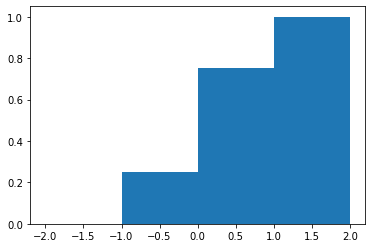

In [3]:
def Y(w1: int, w2: int) -> int:
    return w1 - w2


draws = simulate(omega, Y, num_draws)

print(f"min = {min(draws)}")
print(f"max = {max(draws)}")
print(f"mean = {np.mean(draws)}")
cdf(draws)